<a href="https://colab.research.google.com/github/Zviad777/Datafest-2020/blob/main/Datathon_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing libraries and mounting drive**

In [ ]:
import pandas as pd
import numpy as np
#import Textdistance
import re
from collections import Counter
import os


from google.colab import drive
drive.mount("/content/drive")
path = '/content/drive/MyDrive/Colab Notebooks/Datathon'

os.chdir(path)
!ls


Mounted at /content/drive
atm0.csv  Cashpointids.csv  Datathon.ipynb  train.csv


**Importing some more libraries and reading CSV**

In [ ]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

# Import as Dataframe
#parse_dates=['OPERATIONDATE']
df = pd.read_csv('train.csv', parse_dates=['OPERATIONDATE'])
#pd.to_datetime(df['OPERATIONDATE'])
#df['OPERATIONDATE'] = df['OPERATIONDATE'].astype('datetime64[ns]')



**Sorint data according to Date**

In [ ]:
df['OPERATIONDATE'].min(), df['OPERATIONDATE'].max()

df = df.sort_values(by='OPERATIONDATE')


**Grouping by sum per each day**

In [ ]:
df = df.groupby('OPERATIONDATE')['AMT_SCALED'].sum().reset_index()
df.head()

,OPERATIONDATE,AMT_SCALED
0,2017-01-01,10.129704
1,2017-01-02,16.759918
2,2017-01-03,39.930968
3,2017-01-04,37.909831
4,2017-01-05,42.160241


**Setting Index**

In [ ]:
df = df.set_index('OPERATIONDATE')
df.index

**Visualizing data trend**

<function matplotlib.pyplot.show>

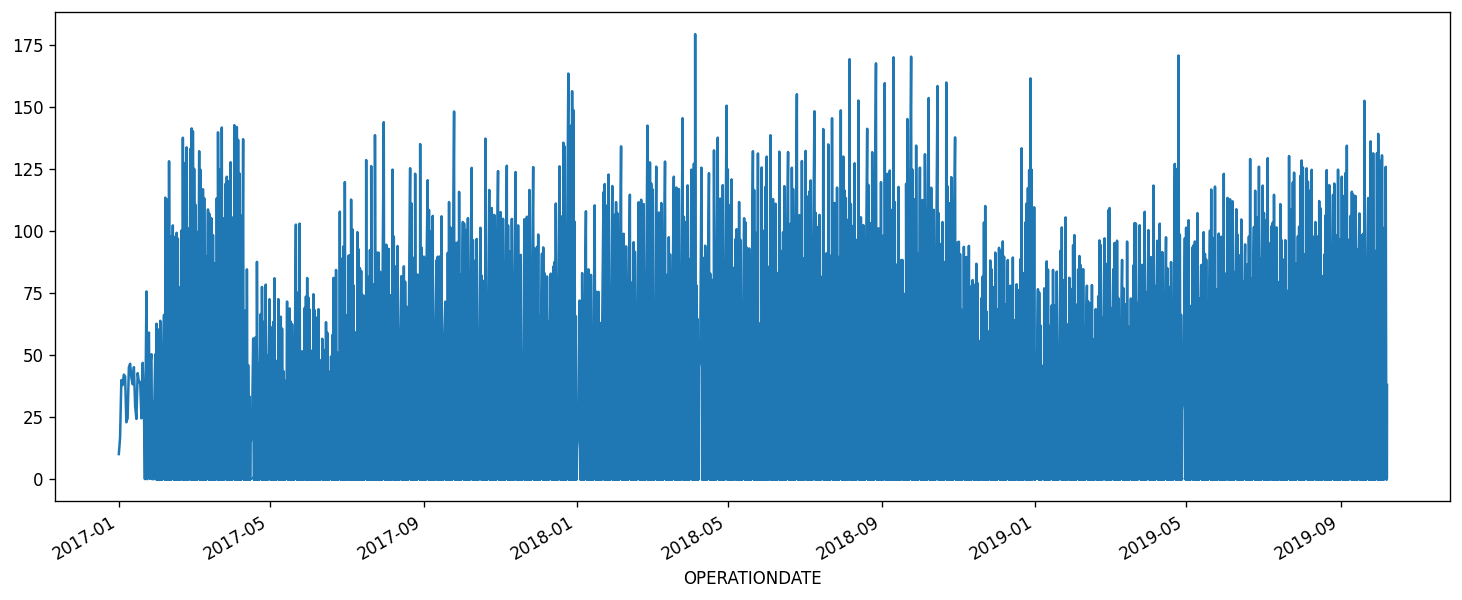

In [ ]:
df.describe
y = df['AMT_SCALED']
y.plot(figsize=(15, 6))
plt.show
#
#

**Visualizing data trend per each year**

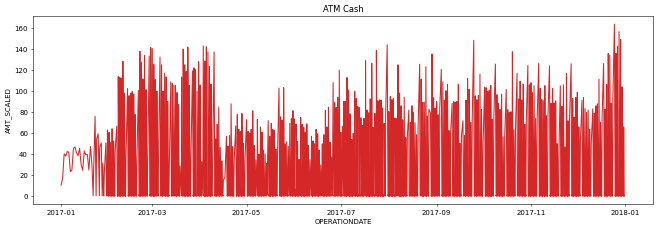

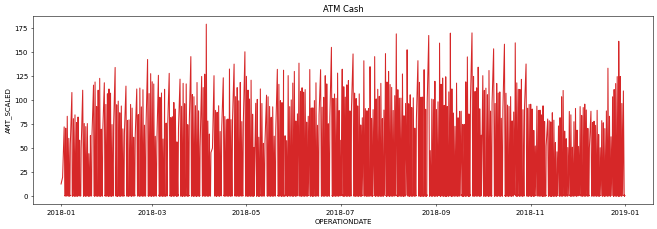

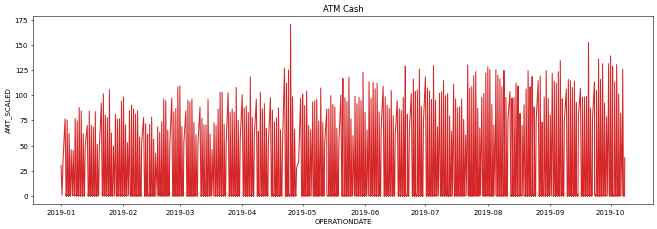

In [ ]:
def plot_df(df, x, y, title="", xlabel='OPERATIONDATE', ylabel='AMT_SCALED', dpi=50):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()


df = df.groupby('OPERATIONDATE')['AMT_SCALED'].sum().reset_index()
df1 = df.loc[df['OPERATIONDATE'] < '1/1/2018']
df1 = df1.set_index('OPERATIONDATE')
df2 = df.loc[(df['OPERATIONDATE'] >= '1/1/2018') & (df['OPERATIONDATE'] < '1/1/2019')]
df2 = df2.set_index('OPERATIONDATE')
df3 = df.loc[df['OPERATIONDATE'] >= '1/1/2019']
df3 = df3.set_index('OPERATIONDATE')

plot_df(df1, x=df1.index, y=df1.AMT_SCALED, title='ATM Cash')    

plot_df(df2, x=df2.index, y=df2.AMT_SCALED, title='ATM Cash')

plot_df(df3, x=df3.index, y=df3.AMT_SCALED, title='ATM Cash')




**Plotting autocorrelation**

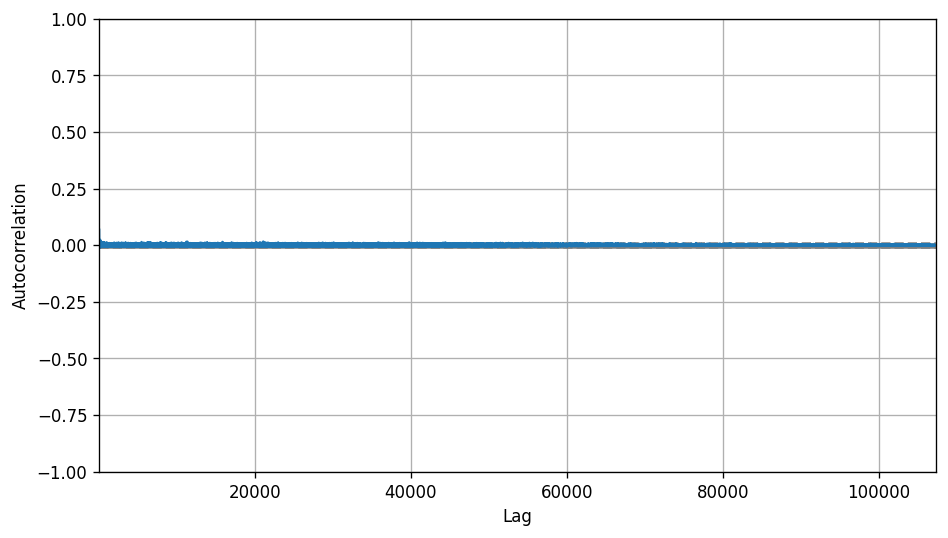

In [ ]:
# Draw Plot
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(df.AMT_SCALED.tolist())


**Smoothening data for clear overview**

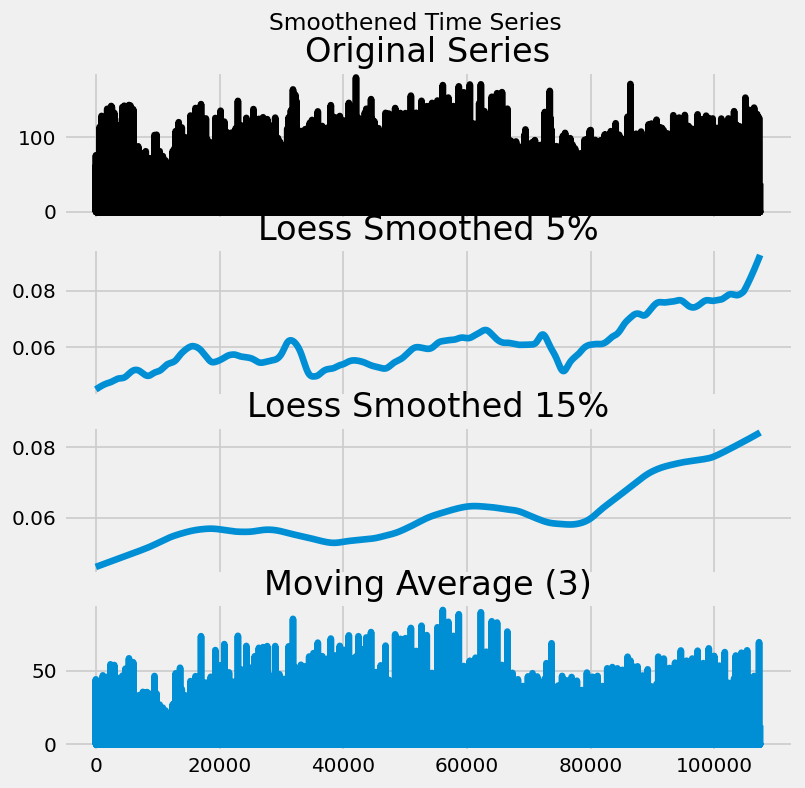

In [ ]:
from statsmodels.nonparametric.smoothers_lowess import lowess
plt.rcParams.update({'xtick.bottom' : False, 'axes.titlepad':5})

# 1. Moving Average
df_ma = df.AMT_SCALED.rolling(3, center=True).mean()

# 2. Loess Smoothing (5% and 15%)
df_loess_5 = pd.DataFrame(lowess(df.AMT_SCALED, np.arange(len(df.AMT_SCALED)), frac=0.05)[:, 1], index=df.index, columns=['AMT_SCALED'])
df_loess_15 = pd.DataFrame(lowess(df.AMT_SCALED, np.arange(len(df.AMT_SCALED)), frac=0.15)[:, 1], index=df.index, columns=['AMT_SCALED'])

# Plot
fig, axes = plt.subplots(4,1, figsize=(7, 7), sharex=True, dpi=120)
df['AMT_SCALED'].plot(ax=axes[0], color='k', title='Original Series')
df_loess_5['AMT_SCALED'].plot(ax=axes[1], title='Loess Smoothed 5%')
df_loess_15['AMT_SCALED'].plot(ax=axes[2], title='Loess Smoothed 15%')
df_ma.plot(ax=axes[3], title='Moving Average (3)')
fig.suptitle('Smoothened Time Series', y=0.95, fontsize=14)
plt.show()

**Observing Trend, Seasonality and residuals on the data**

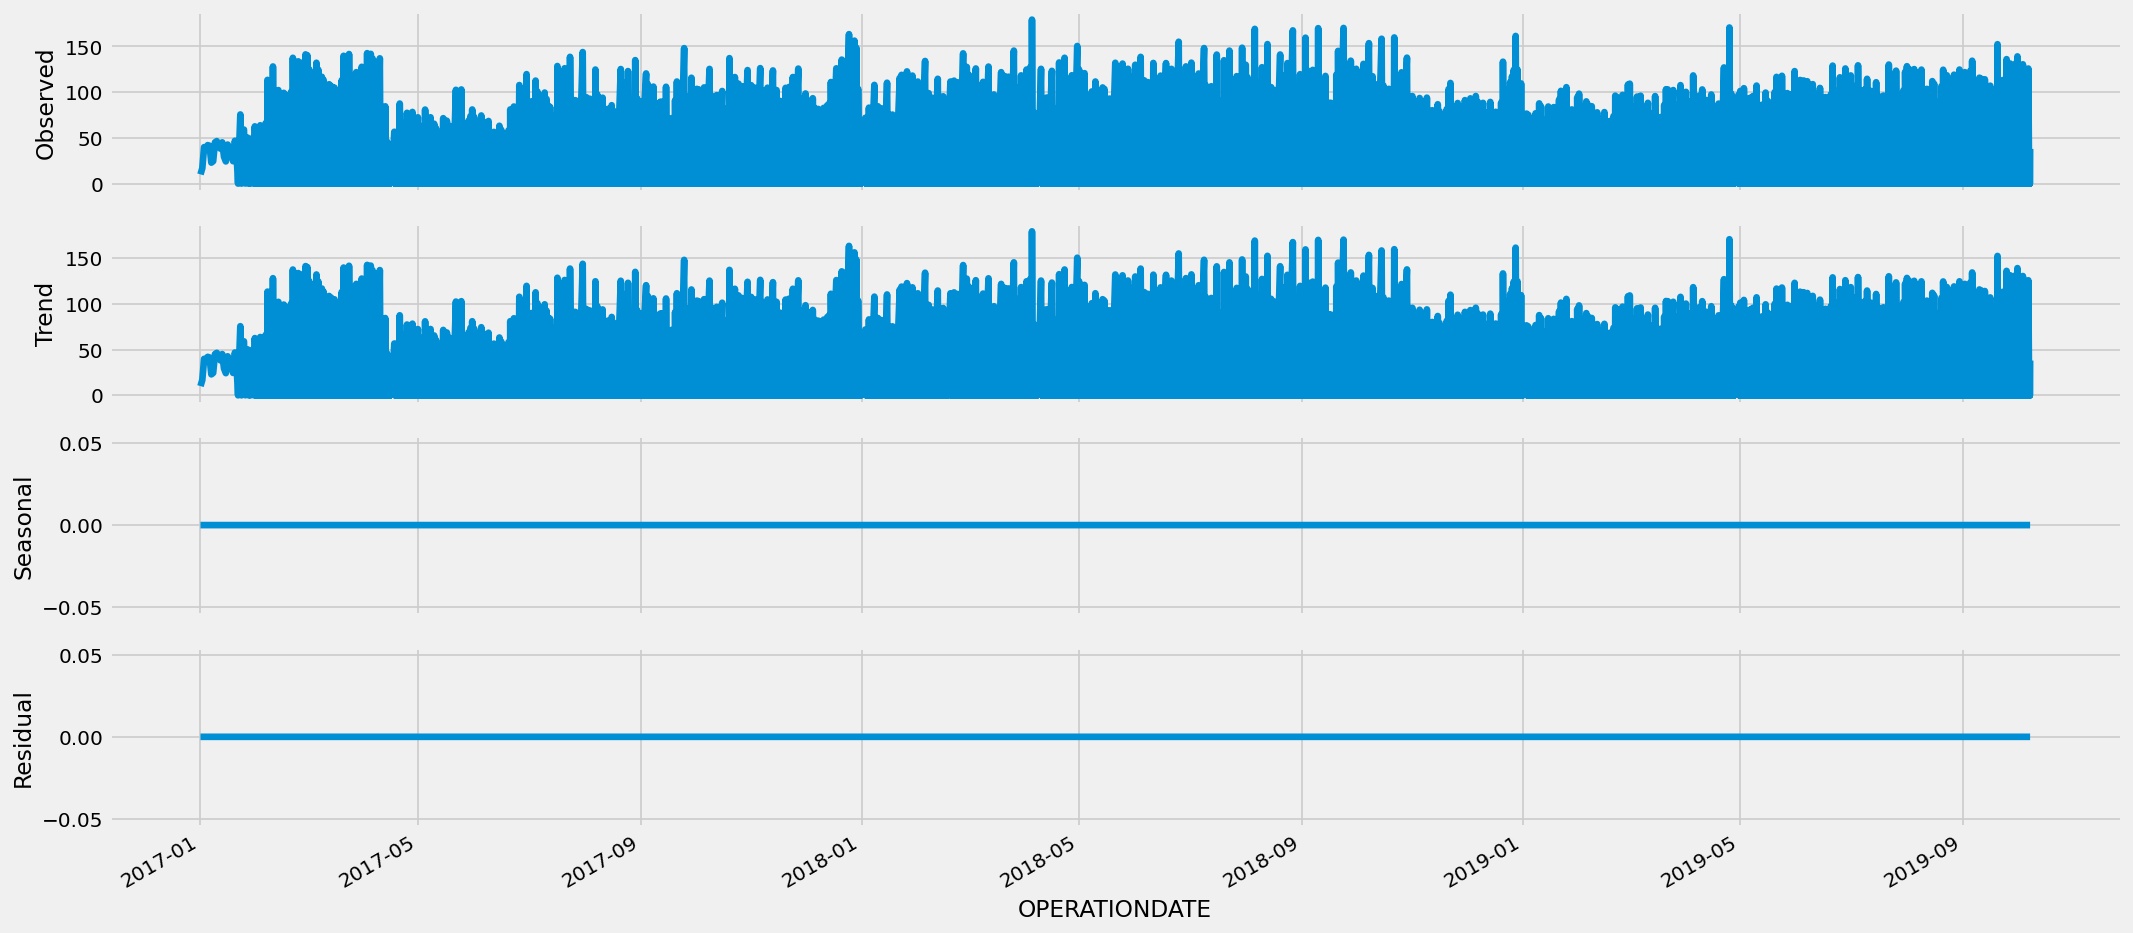

In [ ]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive', filt=None, freq=1)
fig = decomposition.plot()
plt.show()